In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Datasets/sao-paulo-daily-temperature.csv'
df = pd.read_csv(path)

In [ ]:
#Making the Dataset from 2015 to 2019
df=df[df['Year'] >= 2015]
df = df[df['Year'] < 2020]

In [ ]:
display(df)

,Month,Day,Year,AvgTemperature,Date
7305,1,1,2015,80.3,2015-01-01
7306,1,2,2015,80.6,2015-01-02
7307,1,3,2015,73.9,2015-01-03
7308,1,4,2015,73.3,2015-01-04
7309,1,5,2015,72.9,2015-01-05
...,...,...,...,...,...
9127,12,27,2019,71.7,2019-12-27
9128,12,28,2019,74.3,2019-12-28
9129,12,29,2019,73.7,2019-12-29
9130,12,30,2019,73.4,2019-12-30


In [ ]:
df.dtypes

,0
Month,int64
Day,int64
Year,int64
AvgTemperature,float64
Date,object


In [ ]:
# Create lag features
for lag in range(1, 13):
    df[f'lag_{lag}'] = df['AvgTemperature'].shift(lag)

In [ ]:
# Drop rows with NaN values
df = df.dropna()

In [ ]:
# Train-test split
train = df[df['Year'] < 2019 ]
test = df[df['Year'] == 2019]

In [ ]:
X_train = train.drop(columns=['AvgTemperature', 'Year','Month', 'Day', 'Date'])
y_train = train['AvgTemperature']
X_test = test.drop(columns=['AvgTemperature', 'Year','Month', 'Day', 'Date'])
y_test = test['AvgTemperature']

In [ ]:
# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [ ]:
#Turning Date Column to Date Type
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-867-268fb22f056b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
from sklearn.metrics import mean_absolute_error
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Compute R²
test_r2 = r2_score(y_test, y_pred)
print(f"Test R²: {test_r2:.4f}")

# Compute RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse:.4f}")

# Compute MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Test MAPE: {test_mape:.2f}%")

Mean Absolute Error: 2.789858165273508
Test R²: 0.6648
Test RMSE: 3.6939
Test MAPE: 4.08%


In [ ]:
test['Date'] = pd.to_datetime(test['Date'])

<ipython-input-869-a9d53fe2aee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Date'] = pd.to_datetime(test['Date'])


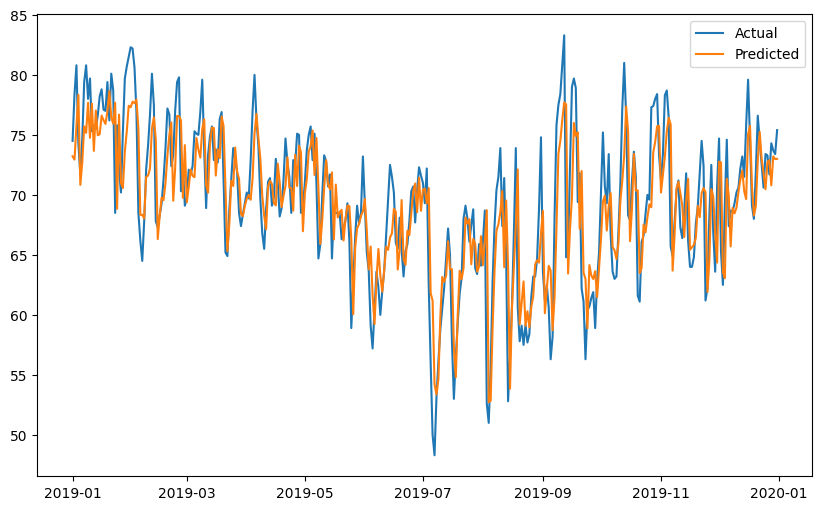

In [ ]:
# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], y_test, label='Actual')
plt.plot(test['Date'], y_pred, label='Predicted')
plt.legend()
plt.show()